In [1]:
%matplotlib inline

import os
import numpy as np
import glob
import random

from preprocessing import *
from visualize import *

from matplotlib import pyplot as plt

/home/samuel_cahyawijaya/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
model_name = 'demo_dcc_crowdnet'
model_path = os.path.expanduser(os.path.join('./models/', model_name))
data_path = os.path.expanduser(os.path.join('./data/', model_name))
weights_path = os.path.expanduser(os.path.join('./models/', model_name))

dataset_paths = ['dataset/UCF_CC_50/']

slice_w = 256
slice_h = 256

patch_w = 225
patch_h = 225

net_density_h = 27
net_density_w = 27

In [3]:
#mean
VGG_ILSVRC_16_layers_mean = np.zeros((3, patch_h, patch_w), dtype='f4')
VGG_ILSVRC_16_layers_mean[0,:,:] = 103.939
VGG_ILSVRC_16_layers_mean[1,:,:] = 116.779
VGG_ILSVRC_16_layers_mean[2,:,:] = 123.68

In [4]:
# Positive image and ground truth loading
X_fs = []
Y_fs = []

for path in dataset_paths:
    images, gts, densities = load_images_and_gts(path)
    X_fs += images
    Y_fs += densities

dataset/UCF_CC_50/37.json
(768, 1024)
dataset/UCF_CC_50/20.json
dataset/UCF_CC_50/20.json 62.50520805512529 637.2357512953367 (<class 'IndexError'>, IndexError('index 637 is out of bounds for axis 1 with size 600',), <traceback object at 0x7f0a0c264ec8>)
(384, 600)
dataset/UCF_CC_50/36.json
(768, 1024)
dataset/UCF_CC_50/8.json
(768, 1024)
dataset/UCF_CC_50/3.json
(752, 1024)
dataset/UCF_CC_50/15.json
(528, 640)
dataset/UCF_CC_50/43.json
(496, 744)
dataset/UCF_CC_50/19.json
(496, 360)
dataset/UCF_CC_50/41.json
(656, 1024)
dataset/UCF_CC_50/26.json
(712, 1024)
dataset/UCF_CC_50/47.json
(600, 800)
dataset/UCF_CC_50/34.json
(768, 1024)
dataset/UCF_CC_50/11.json
(744, 1024)
dataset/UCF_CC_50/44.json
(680, 1024)
dataset/UCF_CC_50/1.json
dataset/UCF_CC_50/1.json 149.34820247110426 984.2566389281416 (<class 'IndexError'>, IndexError('index 984 is out of bounds for axis 1 with size 984',), <traceback object at 0x7f09d9c55e48>)
dataset/UCF_CC_50/1.json 533.5036428856122 984.2566389281419 (<class

In [5]:
# Split test an train set
from sklearn.model_selection import train_test_split

# Train 80%, Test 20%
X_fs_train, X_fs_test, Y_fs_train, Y_fs_test = train_test_split(X_fs, Y_fs, test_size=0.2)

In [6]:
# FS: FULL SIZE
X_train, Y_train = X_fs_train, Y_fs_train
X_test, Y_test = X_fs_test, Y_fs_test

# DATA AUGMENTATION
print ('\nMultiscale pyramidal')
print ('TRAIN:')
X_train, Y_train = multiscale_pyramidal(X_train, Y_train)
print (len(X_train), len(Y_train))
print ('TEST:')
X_test, Y_test = multiscale_pyramidal(X_test, Y_test)
print (len(X_test), len(Y_test))

# PATCH SIZE
print ('\nGenerate slices')
print ('TRAIN:')
X_train, Y_train = generate_slices(X_train, Y_train, slice_w=patch_w, slice_h=patch_h, offset=8)
print (len(X_train), len(Y_train))
print ('TEST:')
X_test, Y_test = generate_slices(X_test, Y_test, slice_w=patch_w, slice_h=patch_h)
print (len(X_test), len(Y_test))

print ('\nFlip')
print ('TRAIN:')
X_train, Y_train = flip_slices(X_train, Y_train)
print (len(X_train), len(Y_train))
print ('TEST:')
X_test, Y_test = flip_slices(X_test, Y_test)
print (len(X_test), len(Y_test))

print ('\nSamples gt distribution correction')
print ('TRAIN:')
X_train, Y_train = samples_distribution(X_train, Y_train)
print (len(X_train), len(Y_train))

print ('\nShuffle')
print ('TRAIN:')
X_train, Y_train = shuffle_slices(X_train, Y_train)
print (len(X_train), len(Y_train))
print ('TEST:')
X_test, Y_test = shuffle_slices(X_test, Y_test)
print (len(X_test), len(Y_test))


Multiscale pyramidal
TRAIN:
96 96
TEST:
32 32

Generate slices
TRAIN:
311530 311530
TEST:
226 226

Flip
TRAIN:
623060 623060
TEST:
452 452

Samples gt distribution correction
TRAIN:
8716 8716

Shuffle
TRAIN:
8716 8716
TEST:
452 452


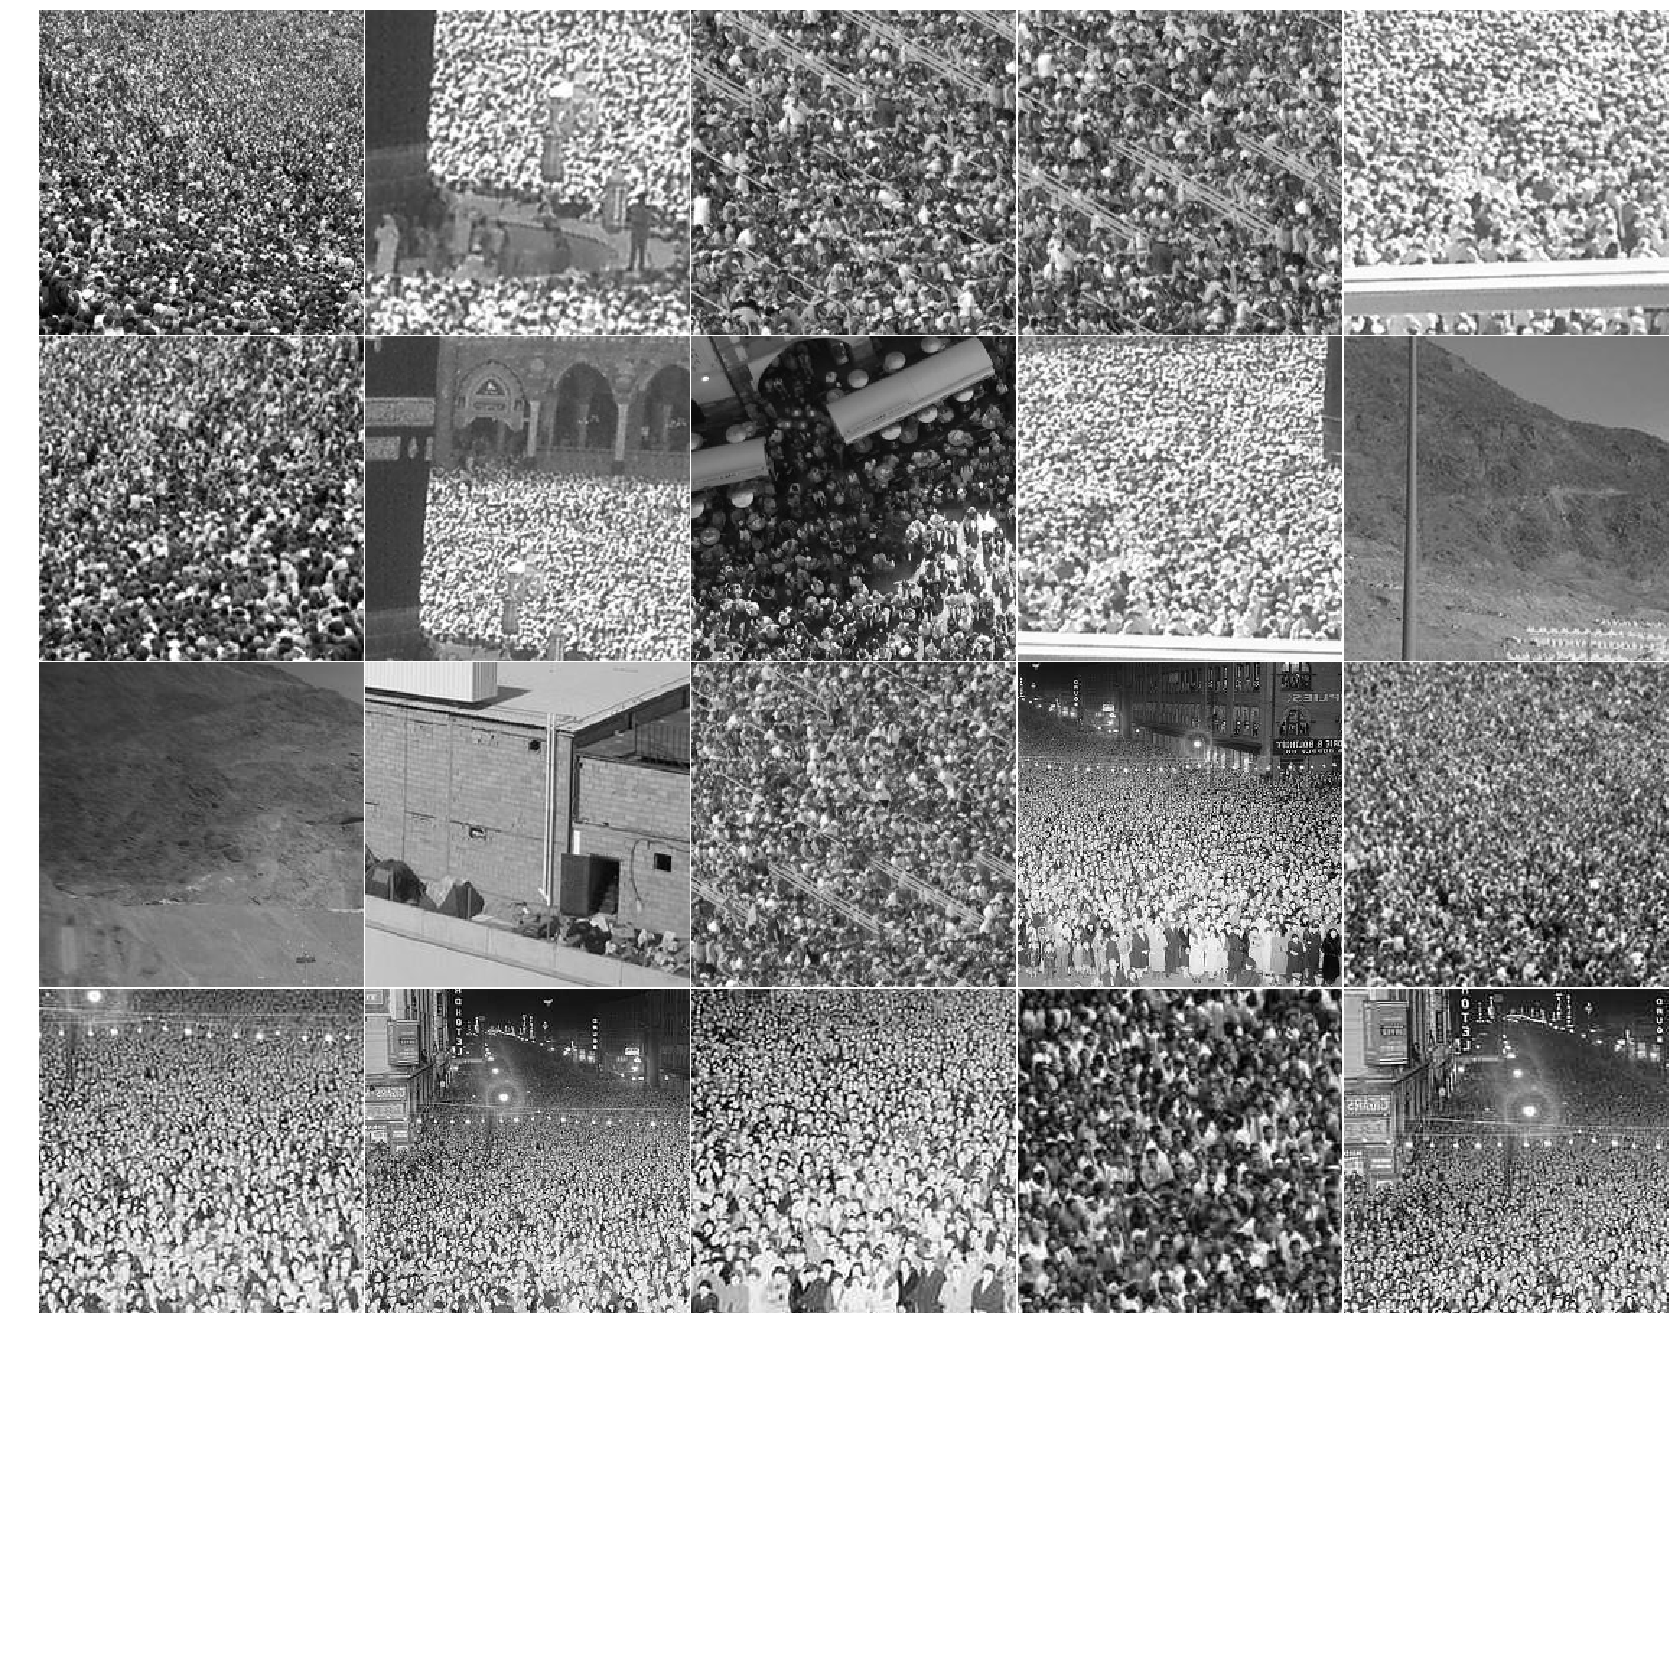

In [7]:
vis_square(list_to_np_array(X_train[:20]))

6774
1338.4767


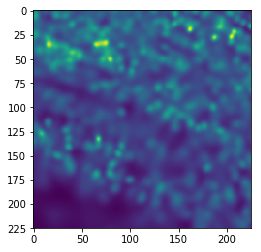

In [8]:
#visualize one random density
i = int(random.random()*len(Y_train))
print(i)
print(np.sum(Y_train[i]))
plt.imshow(np.fliplr(Y_train[i]))

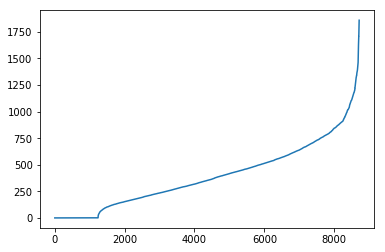

In [9]:
Y_train_sum = list(filter(lambda x: True, map(np.sum, Y_train)))
Y_train_sum.sort()
plt.plot(Y_train_sum)
plt.show()

In [10]:
# Train
print ('TRAIN:')
process_dump_to_hdf5data(X_train, Y_train, data_path, 'train', VGG_ILSVRC_16_layers_mean)
# Test
print ('TEST:')
process_dump_to_hdf5data(X_test, Y_test, data_path, 'test', VGG_ILSVRC_16_layers_mean)

TRAIN:
0 - 6999 / 8716
7000 - 8715 / 8716
TEST:
0 - 451 / 452
